Business Problem


The bank want to build a model such that bank can give a variable rate of intrest to some people. This model will be implemented on bulk but bank done a proof of concept and collected data for some people. Now using this data we have to build a machine learning model which can help us to predict the Interest Rate.

Now we are having data for many variables such as Amount Requested,Amount Funded By Investors,Interest Rate,Loan Length,Loan Purpose,Debt To Income Ratio,Home Ownership,Monthly Income,Open CREDIT Lines,Revolving CREDIT Balance,Inquiries in the Last 6 Months,Employment Length.

Now we have to use this information to make prediction on what should be the Interest Rate

The task now is to predict such a loan rate given the data.
Have you ever thought you get a different interest rate than your friend when you borrow personal loan.


Solution Approach:
As we need to Interest Rate, which is continuous in nature, Linear Regression can be used for prediction

Multiple Linear Regression
Now you know how to build a model with one X (feature variable) and Y (response variable). But what if you have three feature variables, or may be 10 or 100? Building a separate model for each of them, combining them, and then understanding them will be a very difficult and next to impossible task. By using multiple linear regression, you can build models between a response variable and many feature variables.

Let's see how to do that.

Step 1 : Importing LIbraries and Understanding Data


Numpy, pandas , seaborn and matplotlib.pyplot are imported with aliases np, pd, sns and plt respectively

In [3]:
import pandas as pd
import numpy as np

In [4]:
# Importing LabourTrainingEvaluationData.csv
LoanData = pd.read_csv(r'C:\Users\40101464\Desktop\PPT-20190507\Linear Regression-20190708\Case Studies with Solution\Case 2\loans data (1).csv')

In [5]:
# Looking at the first five rows
LoanData.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000.0,0.09,36 months,debt_consolidation,0.15,MORTGAGE,6541.67,14,14272,2,1 year
1,99592.0,19200,19200.0,0.12,36 months,debt_consolidation,0.28,MORTGAGE,4583.33,12,11140,1,2 years
2,80059.0,35000,35000.0,0.22,60 months,debt_consolidation,0.24,MORTGAGE,11500.00,14,21977,1,2 years
3,15825.0,10000,9975.0,0.10,36 months,debt_consolidation,0.14,MORTGAGE,3833.33,10,9346,0,5 years
4,33182.0,12000,12000.0,0.12,36 months,credit_card,0.19,RENT,3195.00,11,14469,0,9 years


In [6]:
# Looking at the last five rows
LoanData.tail()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
2495,23735.0,30000,29950.00,0.17,60 months,debt_consolidation,0.19,MORTGAGE,9250.00,15,45880,1,8 years
2496,65882.0,16000,16000.00,0.14,60 months,home_improvement,0.22,OWN,8903.25,18,18898,1,10+ years
2497,55610.0,10000,10000.00,0.14,36 months,debt_consolidation,0.05,MORTGAGE,2166.67,4,4544,0,10+ years
2498,38576.0,6000,6000.00,0.12,36 months,major_purchase,0.17,RENT,3500.00,8,1275,0,5 years
2499,3116.0,9000,5242.75,0.14,36 months,debt_consolidation,0.07,RENT,3875.00,7,7589,0,10+ years


In [8]:
len(LoanData)

2500

Lets check the data type

In [7]:
# What type of values are stored in the columns?
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
ID                                2499 non-null float64
Amount.Requested                  2500 non-null int64
Amount.Funded.By.Investors        2500 non-null float64
Interest.Rate                     2500 non-null float64
Loan.Length                       2499 non-null object
Loan.Purpose                      2499 non-null object
Debt.To.Income.Ratio              2500 non-null float64
Home.Ownership                    2499 non-null object
Monthly.Income                    2500 non-null float64
Open.CREDIT.Lines                 2500 non-null int64
Revolving.CREDIT.Balance          2500 non-null int64
Inquiries.in.the.Last.6.Months    2500 non-null int64
Employment.Length                 2422 non-null object
dtypes: float64(5), int64(4), object(4)
memory usage: 254.0+ KB


In [9]:
# Let's look at some statistical information about our dataframe.
LoanData.describe()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
count,2499.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,51643.325330,12389.590000,11984.346044,0.130396,0.153752,5685.153348,10.060800,15225.668800,0.910400
std,30053.637661,7814.420929,7743.480223,0.041301,0.075164,3963.376189,4.516687,18308.723678,1.235064
min,10.000000,1000.000000,200.000000,0.050000,0.000000,588.500000,2.000000,0.000000,0.000000
25%,26570.500000,6000.000000,6000.000000,0.100000,0.100000,3474.267500,7.000000,5545.250000,0.000000
50%,50673.000000,10000.000000,10000.000000,0.130000,0.150000,5000.000000,9.000000,10938.000000,1.000000
75%,77583.000000,17000.000000,16000.000000,0.160000,0.210000,6800.000000,13.000000,18870.250000,1.000000
max,104202.000000,35000.000000,35000.000000,0.250000,0.350000,102750.000000,38.000000,270800.000000,9.000000


Step 2: Visualising Data

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


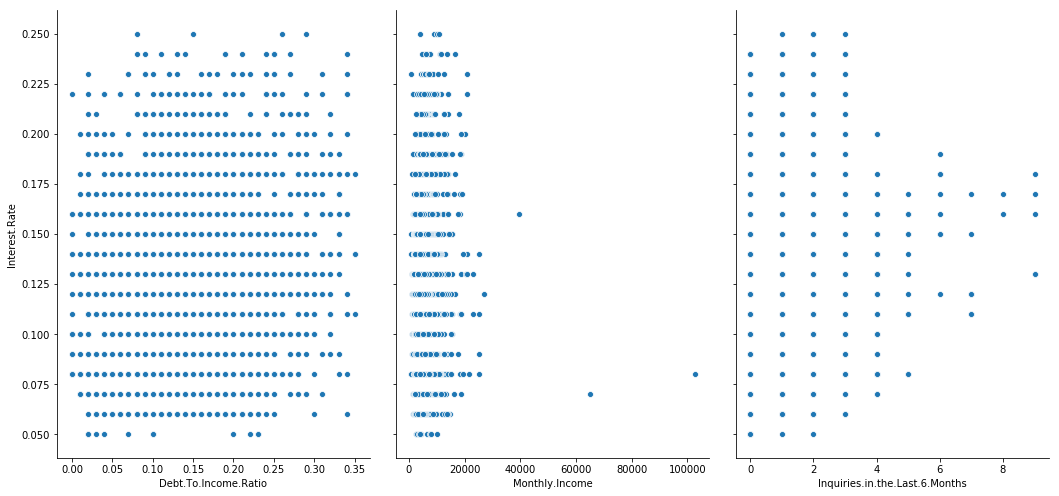

In [11]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(LoanData, x_vars=['Debt.To.Income.Ratio','Monthly.Income','Inquiries.in.the.Last.6.Months'], y_vars='Interest.Rate',
             size=7, aspect=0.7, kind='scatter')

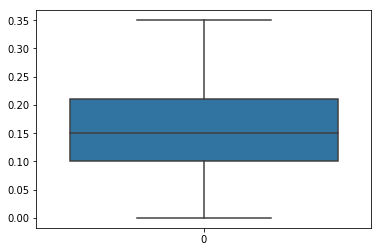

In [12]:
sns.boxplot(data=LoanData["Debt.To.Income.Ratio"])

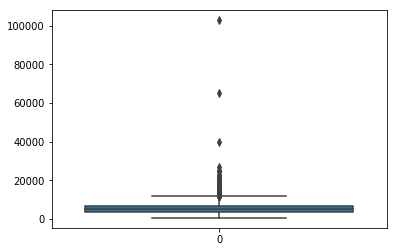

In [13]:
sns.boxplot(data=LoanData["Monthly.Income"])

Exploration of Categorical Variables

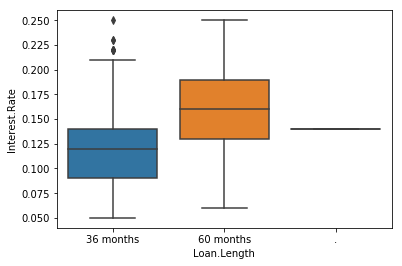

In [14]:
sns.boxplot( x=LoanData["Loan.Length"], y=LoanData["Interest.Rate"] )

In [15]:
LoanData.groupby("Loan.Length")["ID"].nunique()

Loan.Length
.               1
36 months    1950
60 months     547
Name: ID, dtype: int64

In [17]:
# We can see we have one row which is creating problem
# So let us replace that row by mode value which is 36 months
LoanData["Loan.Length"].replace(['.'],['36 months'],inplace=True)

df['Consolidated Latitude'] = df['Consolidated Latitude'].replace('nan', np.nan).fillna(0)

def missing_value_treatment(val):
    try:
        if np.isnan(val)!=True:
            return float(val)
    except:
        return 0.00

volume_data['Neighborhood Index'] = volume_data['Neighborhood Index'].map(lambda x: missing_value_treatment(x))


In [18]:
LoanData.groupby("Loan.Length")["ID"].nunique()
# We can see that the value is replaced.

Loan.Length
36 months    1951
60 months     547
Name: ID, dtype: int64

Seperate the Numerical and Categorical variables

In [21]:
#Numerical Variables:

LoanData.select_dtypes(include=[np.number]).columns.tolist()

['ID',
 'Amount.Requested',
 'Amount.Funded.By.Investors',
 'Interest.Rate',
 'Debt.To.Income.Ratio',
 'Monthly.Income',
 'Open.CREDIT.Lines',
 'Revolving.CREDIT.Balance',
 'Inquiries.in.the.Last.6.Months']

In [22]:
#Removing ID
LoanData_num = LoanData[['Amount.Requested',
 'Amount.Funded.By.Investors',
 'Interest.Rate',
 'Debt.To.Income.Ratio',
 'Monthly.Income',
 'Open.CREDIT.Lines',
 'Revolving.CREDIT.Balance',
 'Inquiries.in.the.Last.6.Months']]

In [23]:
LoanData_num.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Debt.To.Income.Ratio', 'Monthly.Income', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months'],
      dtype='object')

Categorical Variables: The variables which are having category should be converted to dummy variables.

The Linear regression will only accept numbers so we will make dummy variables.

Creation of dummy variables

In [24]:
LoanData.select_dtypes(include=['object']).columns.tolist()

['Loan.Length', 'Loan.Purpose', 'Home.Ownership', 'Employment.Length']

In [25]:
LoanData_dummies = pd.get_dummies(LoanData[['Loan.Length', 'Loan.Purpose', 'Home.Ownership', 'Employment.Length']])

In [26]:
LoanData_dummies.head()

,Loan.Length_36 months,Loan.Length_60 months,Loan.Purpose_car,Loan.Purpose_credit_card,Loan.Purpose_debt_consolidation,Loan.Purpose_educational,Loan.Purpose_home_improvement,Loan.Purpose_house,Loan.Purpose_major_purchase,Loan.Purpose_medical,...,Employment.Length_1 year,Employment.Length_10+ years,Employment.Length_2 years,Employment.Length_3 years,Employment.Length_4 years,Employment.Length_5 years,Employment.Length_6 years,Employment.Length_7 years,Employment.Length_8 years,Employment.Length_9 years
0,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Combine Numerical and Dummy variables

In [27]:
LoanData_combined = pd.concat([LoanData_num, LoanData_dummies], axis=1)

In [28]:
LoanData_combined.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Loan.Length_36 months,Loan.Length_60 months,...,Employment.Length_1 year,Employment.Length_10+ years,Employment.Length_2 years,Employment.Length_3 years,Employment.Length_4 years,Employment.Length_5 years,Employment.Length_6 years,Employment.Length_7 years,Employment.Length_8 years,Employment.Length_9 years
0,20000,20000.0,0.09,0.15,6541.67,14,14272,2,1,0,...,1,0,0,0,0,0,0,0,0,0
1,19200,19200.0,0.12,0.28,4583.33,12,11140,1,1,0,...,0,0,1,0,0,0,0,0,0,0
2,35000,35000.0,0.22,0.24,11500.00,14,21977,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,10000,9975.0,0.10,0.14,3833.33,10,9346,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,12000,12000.0,0.12,0.19,3195.00,11,14469,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
LoanData_combined.isnull().sum(axis = 0)

Amount.Requested                   0
Amount.Funded.By.Investors         0
Interest.Rate                      0
Debt.To.Income.Ratio               0
Monthly.Income                     0
Open.CREDIT.Lines                  0
Revolving.CREDIT.Balance           0
Inquiries.in.the.Last.6.Months     0
Loan.Length_36 months              0
Loan.Length_60 months              0
Loan.Purpose_car                   0
Loan.Purpose_credit_card           0
Loan.Purpose_debt_consolidation    0
Loan.Purpose_educational           0
Loan.Purpose_home_improvement      0
Loan.Purpose_house                 0
Loan.Purpose_major_purchase        0
Loan.Purpose_medical               0
Loan.Purpose_moving                0
Loan.Purpose_other                 0
Loan.Purpose_renewable_energy      0
Loan.Purpose_small_business        0
Loan.Purpose_vacation              0
Loan.Purpose_wedding               0
Home.Ownership_MORTGAGE            0
Home.Ownership_NONE                0
Home.Ownership_OTHER               0
H

Step 3 : Splitting the data in Training and Test set
Using sklearn we split 70% of our data into training set and rest in test set.

Setting random_state will give the same training and test set everytime on running the code.

In [30]:
# Putting feature variable to X
X = LoanData_combined.drop('Interest.Rate', axis= 1)

# Putting response variable to y
y = LoanData_combined['Interest.Rate']

In [31]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

Step 4 : Performing Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [34]:
# fit the model to the training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Step 5 : Model Evaluation

In [35]:
# print the intercept
print(lm.intercept_)

0.12703576133003758


In [36]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df


,Coefficient
Amount.Requested,5.124897e-08
Amount.Funded.By.Investors,1.234640e-06
Debt.To.Income.Ratio,5.383595e-02
Monthly.Income,-5.826722e-07
Open.CREDIT.Lines,-1.221760e-04
Revolving.CREDIT.Balance,-3.953612e-08
Inquiries.in.the.Last.6.Months,6.153026e-03
Loan.Length_36 months,-1.720037e-02
Loan.Length_60 months,1.720037e-02
Loan.Purpose_car,-3.483940e-02


From the above result we may infern that if Age increses by 1 unit

it will affect Earnings_1978 by -105.198175 units.

Step 6 : Predictions

In [37]:
# Making predictions using the model
y_pred = lm.predict(X_test)

In [38]:
y_pred

array([0.10838384, 0.15354585, 0.13276408, 0.11720411, 0.09893044,
       0.11156684, 0.09952034, 0.11429877, 0.11549423, 0.14985774,
       0.1741707 , 0.14983078, 0.1339334 , 0.12431941, 0.13498664,
       0.1162575 , 0.16229565, 0.12827419, 0.08396881, 0.17669794,
       0.08896328, 0.15068613, 0.08262859, 0.11995058, 0.12005868,
       0.10964147, 0.15677268, 0.09883941, 0.1085616 , 0.15700453,
       0.14139636, 0.09196573, 0.12770298, 0.14610562, 0.12117327,
       0.17157232, 0.13915442, 0.11455124, 0.09963728, 0.10890855,
       0.13199406, 0.11888564, 0.118905  , 0.11861732, 0.16335623,
       0.11976367, 0.12864432, 0.13992403, 0.11800677, 0.12017655,
       0.13876212, 0.1023293 , 0.14178703, 0.16961594, 0.12802037,
       0.12460358, 0.14144084, 0.11720995, 0.13167419, 0.19232569,
       0.12203603, 0.12147383, 0.11525578, 0.12381754, 0.13661647,
       0.11978025, 0.16970086, 0.11207865, 0.14031008, 0.13795546,
       0.14010565, 0.12845302, 0.13224712, 0.17288863, 0.12926

Step 7: Model Performance Metrics

Coefficient of Determination (R square)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [41]:
from math import sqrt
rmse = sqrt(mse)

In [42]:
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0011763424815525027
Root_Mean_Squared_Error : 0.034297849517899846
r_square_value : 0.2771566104819654
